In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/pdf/dataset/train'
valid_path = 'C:/pdf/dataset/validation'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('C:/pdf/dataset/train/*')

In [7]:
folders

['C:/pdf/dataset/train\\glaucoma', 'C:/pdf/dataset/train\\nonglaucoma']

In [8]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/pdf/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 455 images belonging to 2 classes.


In [16]:
training_set

In [17]:
test_set = test_datagen.flow_from_directory('C:/pdf/dataset/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 455 images belonging to 2 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\harshith s r\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 42s 3s/step - loss: 1.8432 - accuracy: 0.4221 - val_loss: 0.6781 - val_accuracy: 0.5275
Epoch 2/50
15/15 [==============================] - 32s 2s/step - loss: 0.6740 - accuracy: 0.5694 - val_loss: 0.6125 - val_accuracy: 0.7538
Epoch 3/50
15/15 [==============================] - 32s 2s/step - loss: 0.5834 - accuracy: 0.7573 - val_loss: 0.4864 - val_accuracy: 0.7934
Epoch 4/50
15/15 [==============================] - 32s 2s/step - loss: 0.5248 - accuracy: 0.7242 - val_loss: 0.5175 - val_accuracy: 0.7538
Epoch 5/50
15/15 [==============================] - 31s 2s/step - loss: 0.5375 - accuracy: 0.7502 - val_loss: 0.5033 - val_accuracy: 0.7516
Epoch 6/50
15/15 [==============================] - 31s 2s/step - loss: 0.4706 - accuracy: 0.7838 - val_loss: 0.4629 - val_accuracy: 0.7956
Epoch 7/50
15/15 [==============================] - 35s 2s/step - loss: 0.4601 - accuracy: 0.7928 - val_loss: 0.3892 - val_accuracy: 0.8396
Epoch 8/50
15/15 [==

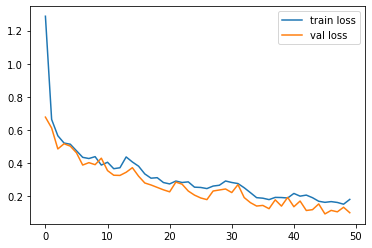

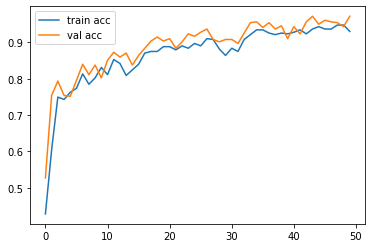

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [21]:

y_pred = model.predict(test_set)


In [22]:
y_pred

array([[9.81542282e-03, 9.90184546e-01],
       [5.23652077e-01, 4.76347893e-01],
       [9.97319996e-01, 2.68002460e-03],
       [6.44607469e-03, 9.93553996e-01],
       [2.30973563e-03, 9.97690320e-01],
       [9.97486353e-01, 2.51361472e-03],
       [1.75102353e-01, 8.24897647e-01],
       [7.19665825e-01, 2.80334175e-01],
       [7.81539321e-01, 2.18460619e-01],
       [8.22096705e-01, 1.77903324e-01],
       [9.97918785e-01, 2.08119838e-03],
       [9.87608433e-01, 1.23915849e-02],
       [9.84851539e-01, 1.51484599e-02],
       [8.03704739e-01, 1.96295232e-01],
       [1.13492580e-02, 9.88650799e-01],
       [9.90099728e-01, 9.90027841e-03],
       [8.67388770e-02, 9.13261175e-01],
       [9.45017099e-01, 5.49829118e-02],
       [9.84292924e-01, 1.57071147e-02],
       [8.86792899e-04, 9.99113142e-01],
       [6.18456006e-02, 9.38154399e-01],
       [6.49678463e-04, 9.99350369e-01],
       [7.34757110e-02, 9.26524282e-01],
       [9.76804554e-01, 2.31954437e-02],
       [8.795139

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_vgg19.h5')

In [27]:
img=image.load_img('C:/pdf/dataset/test/glaucoma/Im182.jpg',target_size=(224,224))



In [28]:
x=image.img_to_array(img)
x

array([[[181.,  72.,  41.],
        [182.,  73.,  42.],
        [182.,  73.,  42.],
        ...,
        [159.,  69.,  43.],
        [158.,  71.,  44.],
        [154.,  67.,  40.]],

       [[177.,  68.,  37.],
        [180.,  71.,  40.],
        [182.,  73.,  42.],
        ...,
        [160.,  70.,  44.],
        [157.,  70.,  43.],
        [157.,  70.,  43.]],

       [[179.,  70.,  39.],
        [177.,  68.,  37.],
        [178.,  69.,  38.],
        ...,
        [159.,  69.,  42.],
        [157.,  70.,  42.],
        [157.,  70.,  42.]],

       ...,

       [[179.,  71.,  42.],
        [177.,  69.,  40.],
        [178.,  70.,  41.],
        ...,
        [153.,  58.,  40.],
        [151.,  58.,  40.],
        [150.,  59.,  40.]],

       [[175.,  70.,  40.],
        [175.,  70.,  40.],
        [178.,  73.,  43.],
        ...,
        [155.,  60.,  42.],
        [153.,  60.,  42.],
        [153.,  60.,  42.]],

       [[173.,  70.,  39.],
        [175.,  72.,  41.],
        [178.,  

In [29]:
x.shape

(224, 224, 3)

In [30]:
x=x/255

In [31]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)

In [34]:
if(a==1):
    print("Normal")
else:
    print("glaucoma")

glaucoma


In [35]:
results={
    0:'glaucoma',
    1:'normal'
}


In [36]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

from tensorflow.keras.models import load_model
model = load_model('model_vgg19.h5')





In [37]:
#dictionary to label all traffic signs class.
classes = { 
    0:'glaucoma',
    1:'normal',
 
}

In [38]:
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Glaucoma vs Normal Classification MITM CSE BATCH 6')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((224,224))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    image = image/255
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),
   padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Glaucoma vs Normal Classification MITM CSE BATCH 6",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()


C:\Users\harshith s r\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


normal
glaucoma
